# **Evaluation GPA sensitivity and accuracy**

**Simulation of the GPA precision and sensitivity with varying phase noise and sampling**

## **Parameters designation**

- **lenght** : number of pixel for the 1D discretization (integer>1)
- **freq** : periodicity in pixel of the sine function (float>0) ==> g = 1/freq
- **center** : position in pixel of the center of the Gaussian mask in Fourier space (integer)
- **sigma** : radius in pixel of the Gaussian mask in Fourier space (float>0)
- **strain** : change of periodicity in pixel of the sine function (float) ==> g +  Δ g = 1 / (freq + strain)
- **noise** : standard deviation of the Gaussian noise (float)

In [2]:
import gpa as gpa
import datastruct as datastruct
import process as process

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.linear_model import LinearRegression


In [3]:
%matplotlib notebook

## Variation of GPA sensitivity with varying phase noise and fixed sampling

* sine frequency: 4 pixels per fringe
* strain: 0.01 %
* phase noise variance: [0 %; 10%] of sine frequency ==> [0; 2$\pi$/10]

In [4]:
length = 1023
freq = 4.0
center = 768
sigma = 10
strain = 0.0001 * freq
noise = np.linspace(0, 2 * np.pi/10, 10000)

data_noise = []

for level in noise:
    data = datastruct.GPAData()
    data.sine = process.sine_1d(length, freq, strain , level)
    data.mask = process.mask_gaussian_1d(data.sine, center, sigma)
    data.gpa = gpa.gpa(data.sine, data.mask)
    data.strain = process.strain_1d(data.gpa, freq)
    data.error_gpa = process.error_gpa_1d(data.gpa, freq, strain)
    data_noise.append(data)

**Extraction and fit of the strain distributions in the unstrained and strained regions (excluding the edges and the interface)**

<IPython.core.display.Javascript object>


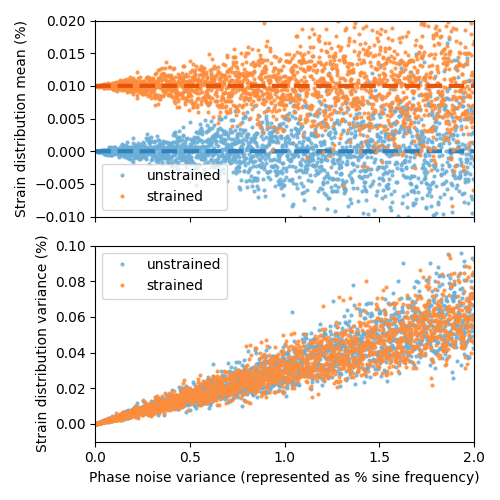

In [5]:
unstrained_mean = []
unstrained_variance = []
strained_mean = []
strained_variance = []

for i, data in enumerate(data_noise):
    param_opt_0 = norm.fit(data.strain[100:int(length/2)-100])
    param_opt_1 = norm.fit(data.strain[int(length/2)+101:-100])
    unstrained_mean.append(param_opt_0[0])
    unstrained_variance.append(param_opt_0[1])
    strained_mean.append(param_opt_1[0])
    strained_variance.append(param_opt_1[1])
    
fig_1a, ax_1a = plt.subplots(2, 1, figsize=(5, 5), sharex=True)

ax_1a[0].plot(noise / (2 * np.pi) * 100, 100 * np.asarray(unstrained_mean), 'o', alpha=0.8, label='unstrained', ms=2, color=plt.cm.tab20c(1))
ax_1a[0].plot(noise / (2 * np.pi) * 100, 0.00 * np.ones(np.shape(noise)), lw=3, ls='dashed', alpha=1, color=plt.cm.tab20c(0))
ax_1a[0].plot(noise / (2 * np.pi) * 100, 100 * np.asarray(strained_mean),'o', alpha=0.8, label='strained', ms=2, color=plt.cm.tab20c(5))
ax_1a[0].plot(noise / (2 * np.pi) * 100, 0.01 * np.ones(np.shape(noise)), lw=3, ls='dashed', alpha=1, color=plt.cm.tab20c(4))

ax_1a[1].plot(noise / (2 * np.pi) * 100, 100 * np.asarray(unstrained_variance), 'o', alpha=0.8, label='unstrained', ms=2, color=plt.cm.tab20c(1))
ax_1a[1].plot(noise / (2 * np.pi) * 100, 100 * np.asarray(strained_variance), 'o', alpha=0.8, label='strained', ms=2, color=plt.cm.tab20c(5))

ax_1a[0].set_xlim(0, 2.0)
ax_1a[0].set_xticks([0.0, 0.5, 1.0, 1.5, 2.0])
ax_1a[0].set_ylim(-0.01, 0.02)
ax_1a[0].set_ylabel('Strain distribution mean (%)')

ax_1a[1].set_ylim(-0.01, 0.1)
ax_1a[1].set_ylabel('Strain distribution variance (%)')
ax_1a[1].set_xlabel('Phase noise variance (represented as % sine frequency)')

ax_1a[0].legend()
ax_1a[1].legend()

fig_1a.tight_layout()
fig_1a.savefig('results/Strain_mean_variance_vs_Phase_noise_4px_fringe.png', dpi=300)

plt.show()

**Visualization of the strain distributions for 4 different phase noises**

noise levels : ['0.010001000100010001%', '0.1000100010001%', '0.5000500050005001%', '0.9990999099909991%']


<IPython.core.display.Javascript object>


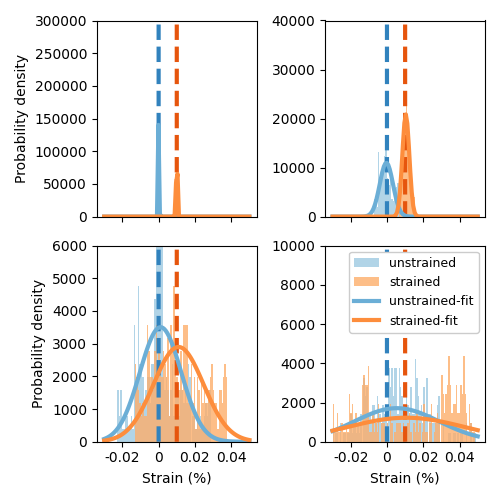

In [6]:
bins = np.linspace(-0.0003, 0.0005, 100)
noise_level = [10, 100, 500, 999]
print('noise levels :', [str(noise[level] / (2 * np.pi) * 100) + '%' for level in noise_level])

A_unstrained = norm.pdf(bins, loc=unstrained_mean[noise_level[0]], scale=unstrained_variance[noise_level[0]])
A_strained = norm.pdf(bins, loc=strained_mean[noise_level[0]], scale=strained_variance[noise_level[0]])
B_unstrained = norm.pdf(bins, loc=unstrained_mean[noise_level[1]], scale=unstrained_variance[noise_level[1]])
B_strained = norm.pdf(bins, loc=strained_mean[noise_level[1]], scale=strained_variance[noise_level[1]])
C_unstrained = norm.pdf(bins, loc=unstrained_mean[noise_level[2]], scale=unstrained_variance[noise_level[2]])
C_strained = norm.pdf(bins, loc=strained_mean[noise_level[2]], scale=strained_variance[noise_level[2]])
D_unstrained = norm.pdf(bins, loc=unstrained_mean[noise_level[3]], scale=unstrained_variance[noise_level[3]])
D_strained = norm.pdf(bins, loc=strained_mean[noise_level[3]], scale=strained_variance[noise_level[3]])

fig_1b, ax_1b = plt.subplots(2, 2, figsize=(5, 5), sharex=True)

indicator = np.arange(0, 3E6, 100)
xticks = [-0.0002, 0, 0.0002, 0.0004]

ax_1b[0, 0].plot(0.00 * np.ones(np.shape(indicator)), indicator, lw=3, ls='dashed', color=plt.cm.tab20c(0))
ax_1b[0, 0].plot(0.0001 * np.ones(np.shape(indicator)), indicator, lw=3, ls='dashed', color=plt.cm.tab20c(4))
ax_1b[0, 0].hist(data_noise[noise_level[0]].strain[100:int(length/2)-100], bins, density=True, label='unstrained', color=plt.cm.tab20c(2), alpha=0.8)
ax_1b[0, 0].hist(data_noise[noise_level[0]].strain[int(length/2)+101:-100], bins, density=True, label='strained', color=plt.cm.tab20c(6), alpha=0.8)
ax_1b[0, 0].plot(bins, A_unstrained, color=plt.cm.tab20c(1), label='unstrained-fit', lw=3)
ax_1b[0, 0].plot(bins, A_strained, color=plt.cm.tab20c(5), label='strained-fit', lw=3)
ax_1b[0, 0].set_xticks(xticks, labels= [100 * i for i in xticks])
ax_1b[0, 0].set_ylim(0, 300000)

ax_1b[0, 1].plot(0.00 * np.ones(np.shape(indicator)), indicator, lw=3, ls='dashed', color=plt.cm.tab20c(0))
ax_1b[0, 1].plot(0.0001 * np.ones(np.shape(indicator)), indicator, lw=3, ls='dashed', color=plt.cm.tab20c(4))
ax_1b[0, 1].hist(data_noise[noise_level[1]].strain[100:int(length/2)-100], bins, density=True, label='unstrained', color=plt.cm.tab20c(2), alpha=0.8)
ax_1b[0, 1].hist(data_noise[noise_level[1]].strain[int(length/2)+101:-100], bins, density=True, label='strained', color=plt.cm.tab20c(6), alpha=0.8)
ax_1b[0, 1].plot(bins, B_unstrained, color=plt.cm.tab20c(1), label='unstrained-fit', lw=3)
ax_1b[0, 1].plot(bins, B_strained, color=plt.cm.tab20c(5), label='strained-fit', lw=3)
ax_1b[0, 1].set_xticks(xticks, labels= [100 * i for i in xticks])
ax_1b[0, 1].set_ylim(0, 40000)

ax_1b[1, 0].plot(0.00 * np.ones(np.shape(indicator)), indicator, lw=3, ls='dashed', color=plt.cm.tab20c(0))
ax_1b[1, 0].plot(0.0001 * np.ones(np.shape(indicator)), indicator, lw=3, ls='dashed', color=plt.cm.tab20c(4))
ax_1b[1, 0].hist(data_noise[noise_level[2]].strain[100:int(length/2)-100], bins, density=True, label='unstrained', color=plt.cm.tab20c(2), alpha=0.8)
ax_1b[1, 0].hist(data_noise[noise_level[2]].strain[int(length/2)+101:-100], bins, density=True, label='strained', color=plt.cm.tab20c(6), alpha=0.8)
ax_1b[1, 0].plot(bins, C_unstrained, color=plt.cm.tab20c(1), label='unstrained-fit', lw=3)
ax_1b[1, 0].plot(bins, C_strained, color=plt.cm.tab20c(5),label='strained-fit', lw=3)
ax_1b[1, 0].set_xticks(xticks, labels= [100 * i for i in xticks])
ax_1b[1, 0].set_ylim(0, 6000)

ax_1b[1, 1].plot(0.00 * np.ones(np.shape(indicator)), indicator, lw=3, ls='dashed', color=plt.cm.tab20c(0))
ax_1b[1, 1].plot(0.0001 * np.ones(np.shape(indicator)), indicator, lw=3, ls='dashed', color=plt.cm.tab20c(4))
ax_1b[1, 1].hist(data_noise[noise_level[3]].strain[100:int(length/2)-100], bins, density=True, label='unstrained', color=plt.cm.tab20c(2), alpha=0.8)
ax_1b[1, 1].hist(data_noise[noise_level[3]].strain[int(length/2)+101:-100], bins, density=True, label='strained', color=plt.cm.tab20c(6), alpha=0.8)
ax_1b[1, 1].plot(bins, D_unstrained, color=plt.cm.tab20c(1), label='unstrained-fit', lw=3)
ax_1b[1, 1].plot(bins, D_strained, color=plt.cm.tab20c(5), label='strained-fit', lw=3)
ax_1b[1, 1].set_xticks(xticks, labels= [100 * i for i in xticks])
ax_1b[1, 1].set_ylim(0, 10000)

ax_1b[1, 0].set_xlabel('Strain (%)')
ax_1b[1, 1].set_xlabel('Strain (%)')
ax_1b[1, 0].set_ylabel('Probability density')
ax_1b[0, 0].set_ylabel('Probability density')

ax_1b[1, 1].legend(fontsize=9, framealpha=1)

fig_1b.tight_layout()
fig_1b.savefig('Strain_distribution_for_4_phase_noise_4px_fringe.png', dpi=300)

plt.show()

## Variation of GPA sensitivity with both varying sampling and phase noise

* sine frequency: [1.01, 100] pixels per fringe
    * [1.01, 2] undersampling (requiring moire correction)
    * ]2, 100] oversampling
* strain: 0.01 %
* phase noise : [0.0 %; 1%] of sine frequency ==> [0.0; 2$\pi$/100]
* **important note** : center and strain parameters change with sampling even if the strain magnitude is physcically constant

In [7]:
length = 1023
freq = np.geomspace(1.01, 100, 1000) #1000
center = [process.mask_position_1d(nu, length+1) for nu in freq]
sigma = 40 / 2 / 3
strain = 0.0001 * freq
noise = np.linspace(0, 2 * np.pi/100, 1000)
data_strain_noise = []

for i, deformation in enumerate(strain):
    data_noise = []
    for level in noise:
        data = datastruct.GPAData()
        data.sine = process.sine_1d(length, freq[i], deformation, level)
        data.mask = process.mask_gaussian_1d(data.sine, center[i], sigma)
        data.gpa = process.gpa_moire_correction(gpa.gpa(data.sine, data.mask), freq[i])
        data.strain = process.strain_1d(data.gpa, freq[i])
        data.error_gpa = process.error_gpa_1d(data.gpa, freq[i], deformation)
        data_noise.append(data)
    data_strain_noise.append(data_noise)

**Extraction and fit of the strain distributions in the unstrained and strained regions (excluding the edges and the interface), then linear fit of the strain variance with phase noise**

In [8]:
all_param_unstrained_mean = []
all_param_unstrained_variance = []
all_param_strained_mean = []
all_param_strained_variance = []
all_coefs = []


for j, data_noise in enumerate(data_strain_noise):
    param_unstrained_mean = []
    param_unstrained_variance = []
    param_strained_mean = []
    param_strained_variance = []
    for i, data in enumerate(data_noise):
        param_opt_0 = norm.fit(data.strain[100:int(1023/2)-100])
        param_opt_1 = norm.fit(data.strain[int(1023/2)+101:-100])
        param_unstrained_mean.append(param_opt_0[0])
        param_unstrained_variance.append(param_opt_0[1])
        param_strained_mean.append(param_opt_1[0])
        param_strained_variance.append(param_opt_1[1])
    all_param_unstrained_mean.append(param_unstrained_mean)
    all_param_unstrained_variance.append(param_unstrained_variance)
    all_param_strained_mean.append(param_strained_mean)
    all_param_strained_variance.append(param_strained_variance)
    x = noise
    x_fit = x.reshape((-1, 1))
    y_fit = np.array(param_unstrained_variance)
    model = LinearRegression().fit(x_fit, y_fit)
    all_coefs.append([model.coef_, model.intercept_]) 

<IPython.core.display.Javascript object>


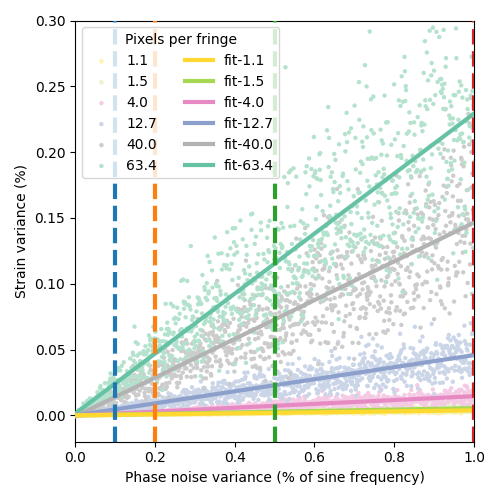

In [9]:
fig_2a, ax_2a = plt.subplots(1, 1, figsize=(5, 5))

ax_2a.scatter(noise / (2 * np.pi) * 100, 100 * np.asarray(all_param_unstrained_variance[10]), alpha=0.99, edgecolors='none', color=plt.cm.Pastel2(5), label=str(round(freq[10], 1)), s=10)
ax_2a.scatter(noise / (2 * np.pi) * 100, 100 * np.asarray(all_param_unstrained_variance[90]), alpha=0.99, edgecolors='none', color=plt.cm.Pastel2(4), label=str(round(freq[90], 1)), s=10)
ax_2a.scatter(noise / (2 * np.pi) * 100, 100 * np.asarray(all_param_unstrained_variance[300]), alpha=0.99, edgecolors='none', color=plt.cm.Pastel2(3), label=str(round(freq[300], 1)), s=10)
ax_2a.scatter(noise / (2 * np.pi) * 100, 100 * np.asarray(all_param_unstrained_variance[550]), alpha=0.99, edgecolors='none', color=plt.cm.Pastel2(2), label=str(round(freq[550], 1)), s=10)
ax_2a.scatter(noise / (2 * np.pi) * 100, 100 * np.asarray(all_param_unstrained_variance[800]), alpha=0.99, edgecolors='none', color=plt.cm.Pastel2(7), label=str(round(freq[800], 1)), s=10)
ax_2a.scatter(noise / (2 * np.pi) * 100, 100 * np.asarray(all_param_unstrained_variance[900]), alpha=0.99, edgecolors='none', color=plt.cm.Pastel2(0), label=str(round(freq[900], 1)), s=10)

ax_2a.plot(noise / (2 * np.pi) * 100, 100 * (all_coefs[10][0] * noise + all_coefs[10][1]), lw=3, label='fit-'+str(round(freq[10], 1)), color=plt.cm.Set2(5), zorder=10)
ax_2a.plot(noise / (2 * np.pi) * 100, 100 * (all_coefs[90][0] * noise + all_coefs[90][1]), lw=3, label='fit-'+str(round(freq[90], 1)), color=plt.cm.Set2(4), zorder=9)
ax_2a.plot(noise / (2 * np.pi) * 100, 100 * (all_coefs[300][0] * noise + all_coefs[300][1]), lw=3, label='fit-'+str(round(freq[300], 1)), color=plt.cm.Set2(3), zorder=8)
ax_2a.plot(noise / (2 * np.pi) * 100, 100 * (all_coefs[550][0] * noise + all_coefs[550][1]), lw=3, label='fit-'+str(round(freq[550], 1)), color=plt.cm.Set2(2), zorder=7)
ax_2a.plot(noise / (2 * np.pi) * 100, 100 * (all_coefs[800][0] * noise + all_coefs[800][1]), lw=3, label='fit-'+str(round(freq[800], 1)), color=plt.cm.Set2(7), zorder=6)
ax_2a.plot(noise / (2 * np.pi) * 100, 100 * (all_coefs[900][0] * noise + all_coefs[900][1]), lw=3, label='fit-'+str(round(freq[900], 1)), color=plt.cm.Set2(0), zorder=5)

ax_2a.plot(0.1 * np.ones((1000)), np.linspace(-0.02, 0.3, 1000), lw=3, ls='dashed', zorder=11)
ax_2a.plot(0.2 * np.ones((1000)), np.linspace(-0.02, 0.3, 1000), lw=3, ls='dashed', zorder=12)
ax_2a.plot(0.5 * np.ones((1000)), np.linspace(-0.02, 0.3, 1000), lw=3, ls='dashed', zorder=13)
ax_2a.plot(1.0 * np.ones((1000)), np.linspace(-0.02, 0.3, 1000), lw=3, ls='dashed', zorder=14)

ax_2a.set_xlabel('Phase noise variance (% of sine frequency)')
ax_2a.set_ylabel('Strain variance (%)')

ax_2a.set_ylim(-0.02, 0.3)
ax_2a.set_xlim(0, 1)

ax_2a.legend(title='Pixels per fringe', ncol=2, fontsize=10, loc=2).set_zorder(15)

fig_2a.tight_layout()

fig_2a.savefig('results/Strain_variance_vs_phase_noise.png', dpi=300)

plt.show()

**Transformation to extract strain variance with sampling at chosen phase noise**

In [10]:
phase_noise = [0.001 * (2 * np.pi), 0.002 * (2 * np.pi), 0.005 * (2 * np.pi), 0.01 * (2 * np.pi), 0.02 * (2 * np.pi), 0.05 * (2 * np.pi)]
phase_noise_label = [0.001, 0.002, 0.005, 0.01, 0.02, 0.05]
all_sensitivity = []

for level in phase_noise:
    sensitivity = []
    for j, element in enumerate(freq):
        sensitivity.append((all_coefs[j][0] * level + all_coefs[j][1]) * 100) 
    all_sensitivity.append(sensitivity)

<IPython.core.display.Javascript object>


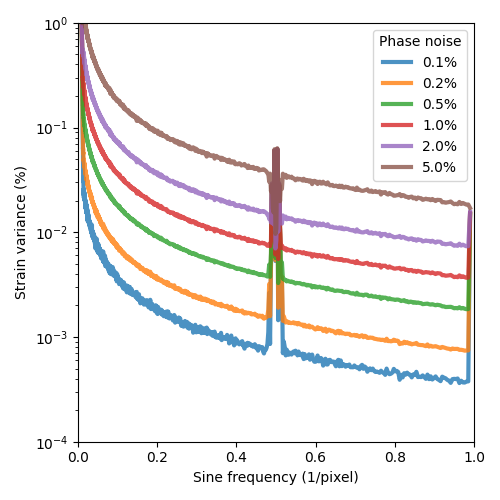

In [11]:
fig_2b, ax_2b = plt.subplots(figsize=(5, 5))
for i,sensitivity in enumerate(all_sensitivity):
    ax_2b.plot(1/freq, sensitivity, lw=3, label=str(phase_noise_label[i] * 100) + '%', alpha=0.8, color=plt.cm.tab10(i))

ax_2b.set_xlim(0, 1)
ax_2b.set_ylim(1E-4, 1)

ax_2b.set_xlabel('Sine frequency (1/pixel)')
ax_2b.set_ylabel('Strain variance (%)')

ax_2b.legend(title='Phase noise')
ax_2b.set_yscale('log')

fig_2b.tight_layout()

fig_2b.savefig('results/Sensitivity_vs_sampling.png', dpi=300)

plt.show()

**Extraction of the simulation parameters to compare with experimental data**

In [12]:
all_coefs_array = []

for coef in all_coefs:
    all_coefs_array.append(np.asarray([coef[0][0], coef[1]]))
    
all_coefs_array = np.asarray(all_coefs_array)

In [13]:
np.save('results/simulation_coef_noise_same_mask_radius_moire', all_coefs_array)
np.save('results/simulation_frequency_same_mask_radius_moire', 1/freq)